<a href="https://colab.research.google.com/github/Sandrasalu/Demo/blob/main/MediaPipe_Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.5 MB/s 


In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math

In [ ]:
from google.colab import files
upload_short_range = files.upload()

Saving arjun.jpg to arjun.jpg
Saving Diya.jpg to Diya.jpg
Saving febin.jpg to febin.jpg


In [ ]:
from google.colab import files
upload_long_range = files.upload()

Saving megha.jpg to megha.jpg
Saving pooja.jpg to pooja.jpg


arjun.jpg


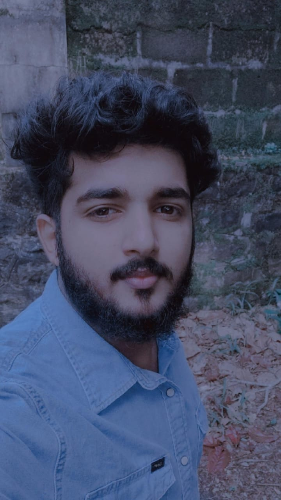

Diya.jpg


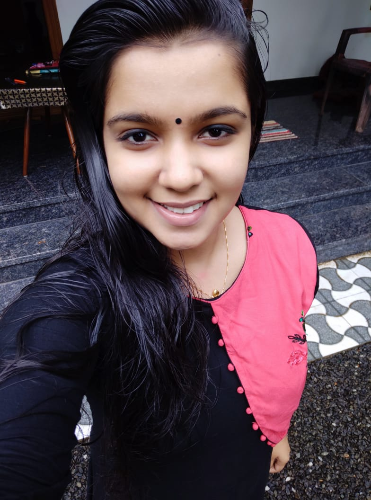

febin.jpg


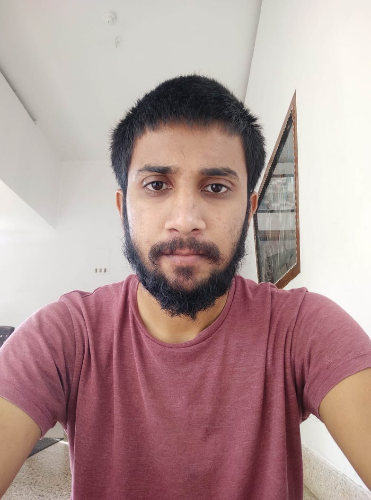

megha.jpg


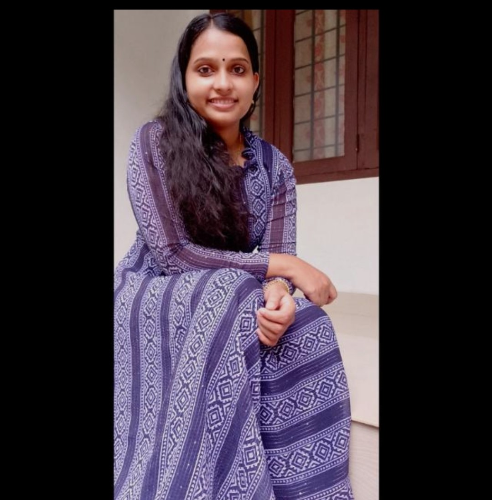

pooja.jpg


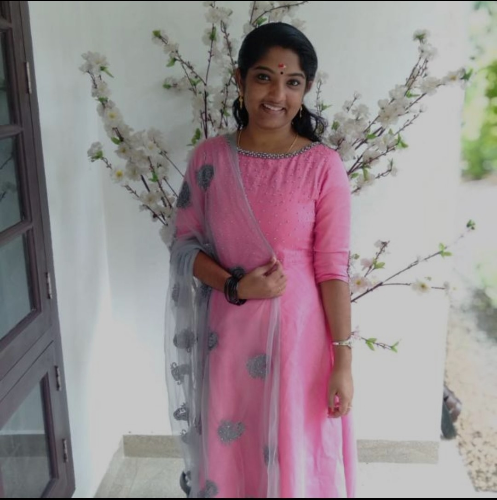

In [ ]:
height = 500
width = 500
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (width, math.floor(h / (w  /width))))
  else:
    img = cv2.resize(image, (math.floor(w / (h / height)), height))
  cv2_imshow(img)

short_range_images = {name: cv2.imread(name) for name in upload_short_range.keys()}
for name, image in short_range_images.items():
  print(name)
  resize_and_show(image)

full_range_images = {name: cv2.imread(name) for name in upload_long_range.keys()}
for name, image in full_range_images.items():
  print(name)
  resize_and_show(image)

In [ ]:
mp_face_detection = mp.solutions.face_detection

In [ ]:
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius = 1)

The face is detected for arjun.jpg :


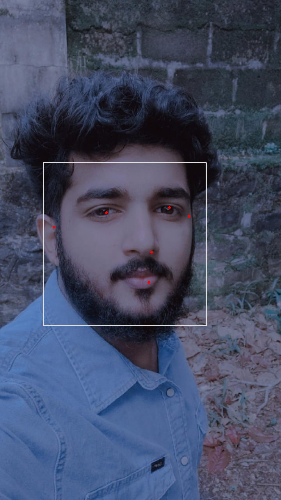

The face is detected for Diya.jpg :


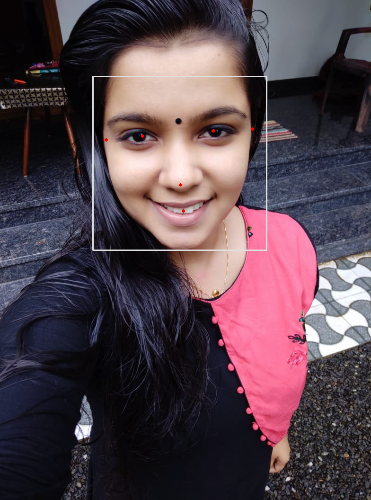

The face is detected for febin.jpg :


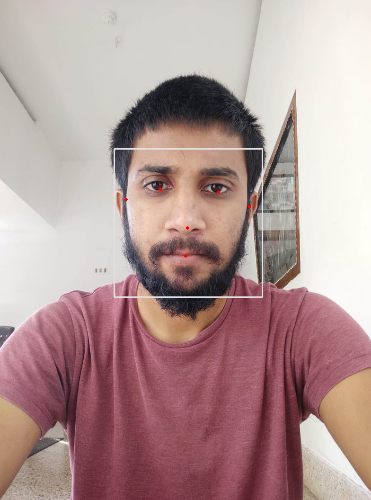

In [ ]:
with mp_face_detection.FaceDetection(min_detection_confidence = 0.7, model_selection = 0) as face_detection :
  for name, image in short_range_images.items() :
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print(f'The face is detected for {name} :')

    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
      resize_and_show(annotated_image)



The face is detected for megha.jpg:


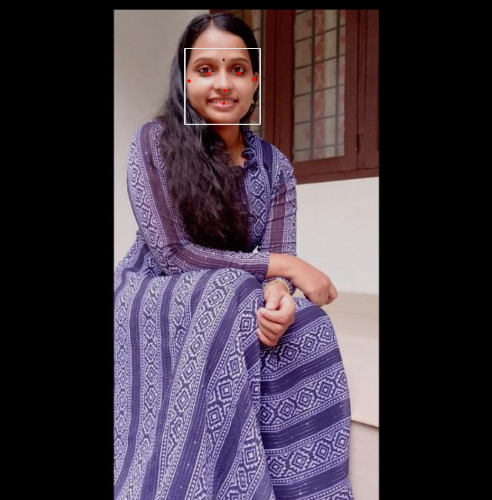

The face is detected for pooja.jpg:


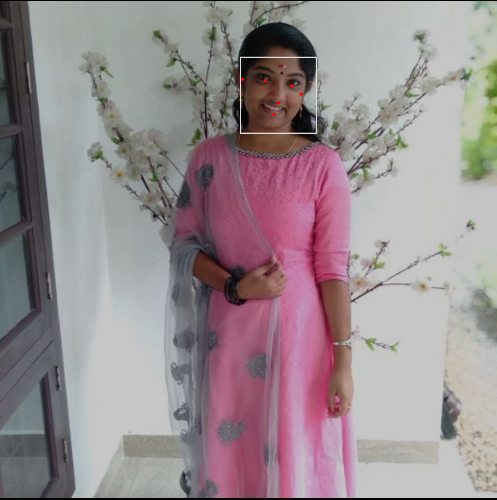

In [ ]:
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:
  for name, image in full_range_images.items():
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print(f'The face is detected for {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)